In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
salesdata=pd.read_csv(r"C:\Users\fayaz\Downloads\Diwali Sales Data.csv", encoding='latin1')

In [5]:
salesdata.shape

(11251, 15)

In [6]:
salesdata.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [20]:
salesdata['Gender']=salesdata['Gender'].replace('F','female')
salesdata['Gender']=salesdata['Gender'].replace('M','male')

In [7]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
salesdata.drop(['Status','unnamed1'],axis=1,inplace=True)

In [10]:
salesdata.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
salesdata.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
salesdata.dropna(inplace=True)

In [13]:
salesdata['Amount']=salesdata['Amount'].astype('int')

In [14]:
salesdata['Amount'].dtype

dtype('int64')

In [15]:
salesdata.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
salesdata.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


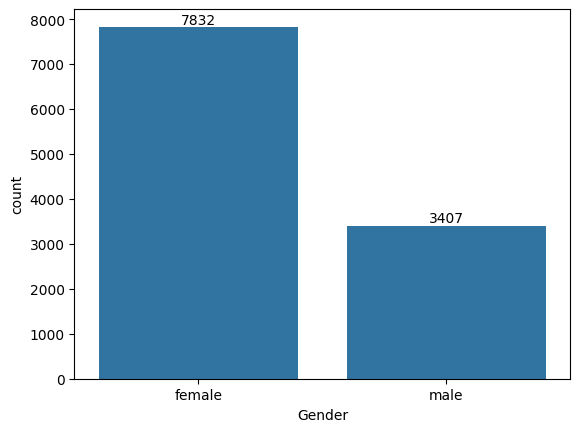

In [25]:
data=sb.countplot(x='Gender',data=salesdata)
for bars in data.containers:
    data.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

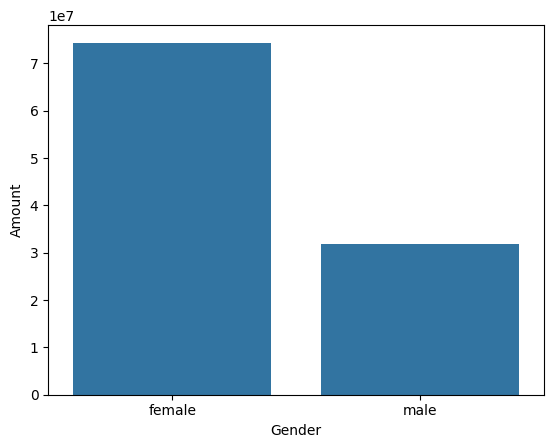

In [ ]:
data1=salesdata.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sb.barplot(x='Gender',y='Amount',data=data1)


females shops more and spends more many

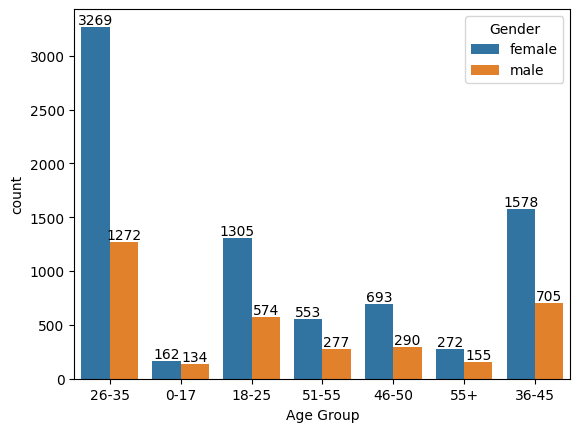

In [ ]:
data2=sb.countplot(x='Age Group', hue='Gender',data=salesdata)
for bars in data2.containers:
    data2.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

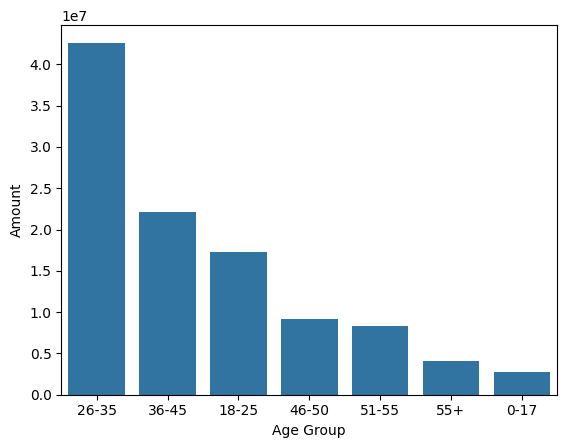

In [28]:
data3=salesdata.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sb.barplot(x='Age Group',y='Amount',data=data3)


females of age group 26-35 spends more amount of money while shoping

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat')])

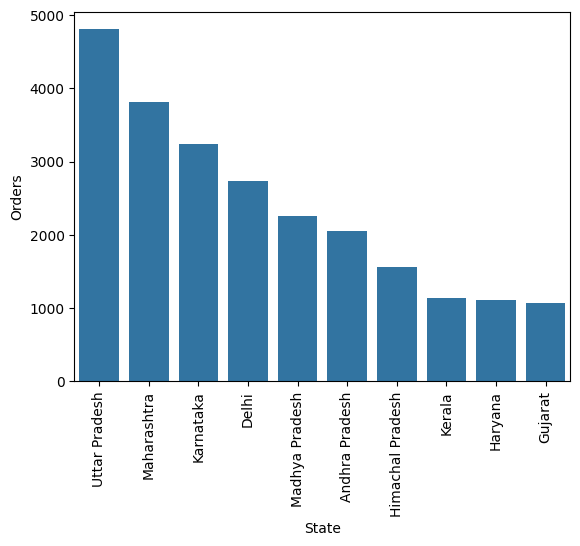

In [31]:
data4=salesdata.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.Figure(figsize=(15,5))
sb.barplot(x='State',y='Orders',data=data4)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat')])

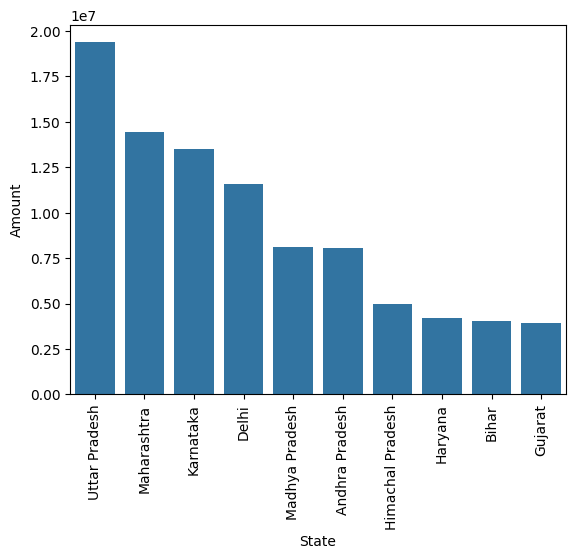

In [32]:
data4=salesdata.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.Figure(figsize=(15,5))
sb.barplot(x='State',y='Amount',data=data4)
plt.xticks(rotation=90)

In [ ]:
uttar pradesh ,maharashtra and karnataka has higher sales

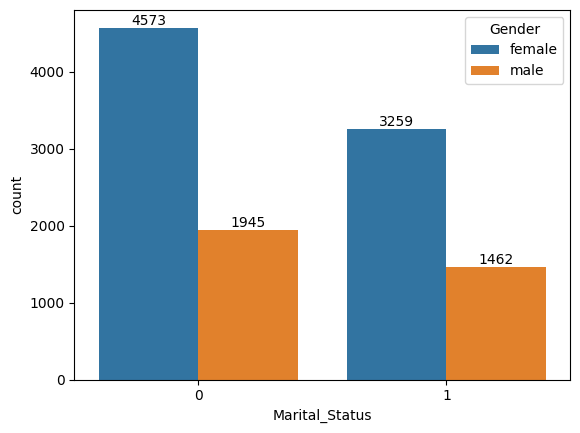

In [33]:
data5=sb.countplot(x='Marital_Status', hue='Gender',data=salesdata)
for bars in data5.containers:
    data5.bar_label(bars)

[Text(0, 0, '43786646.00'), Text(0, 0, '30549207.00')]

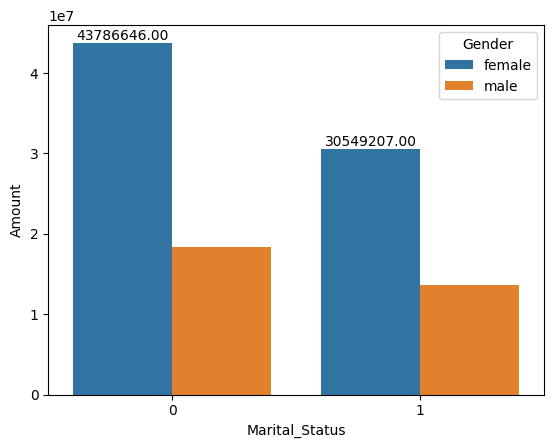

In [36]:
data6=salesdata.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.Figure(figsize=(15,5))
sb.barplot(x='Marital_Status',y='Amount', hue='Gender',data=data6)
plt.bar_label(plt.gca().containers[0],fmt='%.2f')


ummarried females spend more amount of money

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Govt'),
  Text(2, 0, 'Automobile'),
  Text(3, 0, 'Construction'),
  Text(4, 0, 'Food Processing'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Banking'),
  Text(8, 0, 'Retail'),
  Text(9, 0, 'IT Sector'),
  Text(10, 0, 'Aviation'),
  Text(11, 0, 'Hospitality'),
  Text(12, 0, 'Agriculture'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Chemical')])

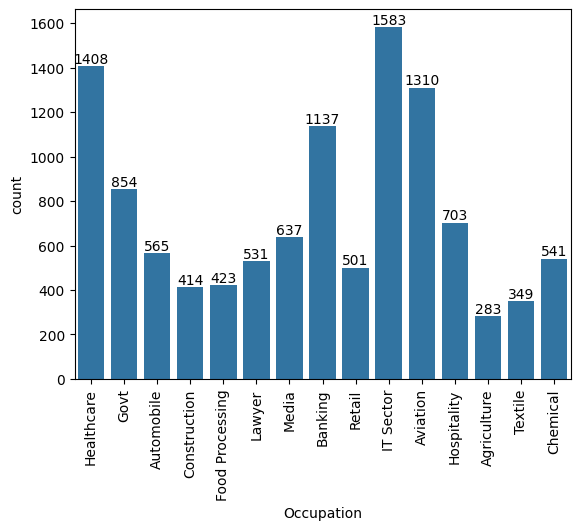

In [39]:
plt.Figure(figsize=(20,5))
data7=sb.countplot(x='Occupation',data=salesdata)
for bars in data7.containers:
    data7.bar_label(bars)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'IT Sector'),
  Text(1, 0, 'Healthcare'),
  Text(2, 0, 'Aviation'),
  Text(3, 0, 'Banking'),
  Text(4, 0, 'Govt'),
  Text(5, 0, 'Hospitality'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Automobile'),
  Text(8, 0, 'Chemical'),
  Text(9, 0, 'Lawyer'),
  Text(10, 0, 'Retail'),
  Text(11, 0, 'Food Processing'),
  Text(12, 0, 'Construction'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Agriculture')])

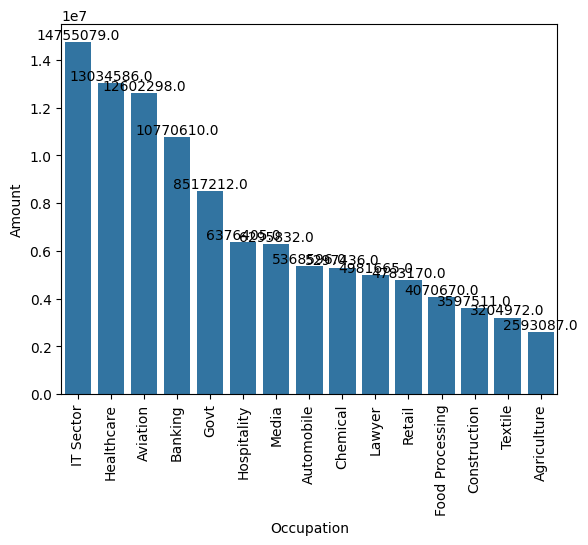

In [45]:
data8=salesdata.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.Figure(figsize=(15,5))
sb.barplot(x='Occupation',y='Amount',data=data8)
plt.bar_label(plt.gca().containers[0],fmt='%.1f')
plt.xticks(rotation=90)


healthcare department did more shoping but it section spends more money 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

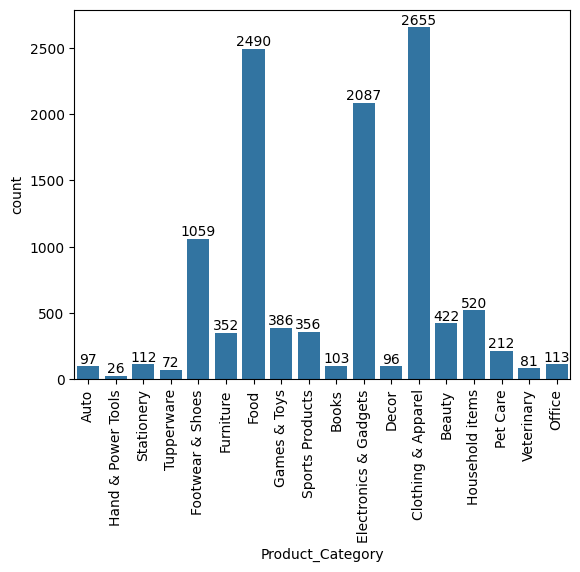

In [47]:
plt.Figure(figsize=(20,5))
data9=sb.countplot(x='Product_Category',data=salesdata)
for bars in data9.containers:
    data9.bar_label(bars)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Auto'),
  Text(9, 0, 'Stationery'),
  Text(10, 0, 'Household items'),
  Text(11, 0, 'Tupperware'),
  Text(12, 0, 'Books'),
  Text(13, 0, 'Decor'),
  Text(14, 0, 'Pet Care'),
  Text(15, 0, 'Hand & Power Tools'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

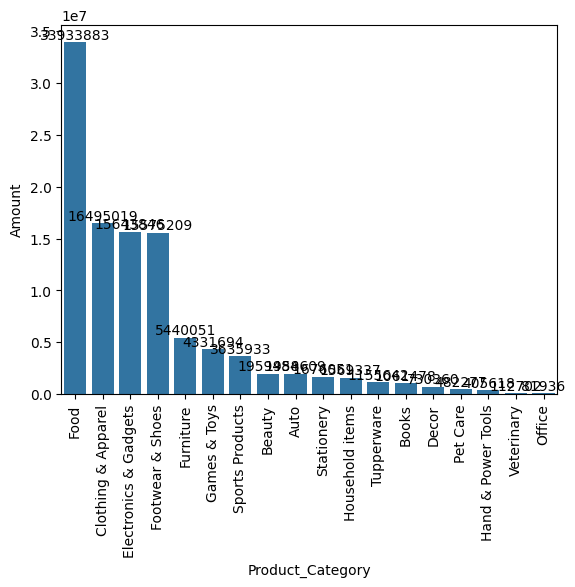

In [50]:
data10=salesdata.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.Figure(figsize=(20,5))
sb.barplot(x='Product_Category',y='Amount',data=data10)
plt.bar_label(plt.gca().containers[0],fmt='%.0f')
plt.xticks(rotation=90)


clothing & apparel has more selling count but amount spent on food is more

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'P00265242'),
  Text(1, 0, 'P00110942'),
  Text(2, 0, 'P00237542'),
  Text(3, 0, 'P00184942'),
  Text(4, 0, 'P00025442'),
  Text(5, 0, 'P00114942'),
  Text(6, 0, 'P00145042'),
  Text(7, 0, 'P00117942'),
  Text(8, 0, 'P00044442'),
  Text(9, 0, 'P00110842')])

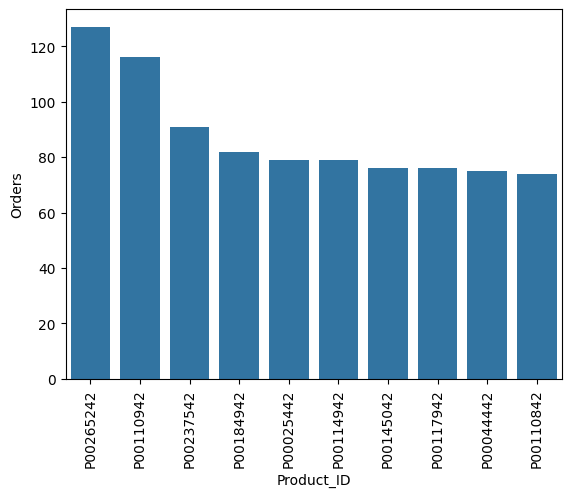

In [53]:
data11=salesdata.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.Figure(figsize=(15,5))
sb.barplot(x='Product_ID',y='Orders',data=data11)
plt.xticks(rotation=90)

married women age group 26-35 yrs from up,maharastra and karnataka working in IT, Healthcare and aviation are more likely to buy products from food clothing and electronics category